In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train.csv')
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.dropna(inplace=True, axis=0)

In [8]:
df.shape

(404287, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

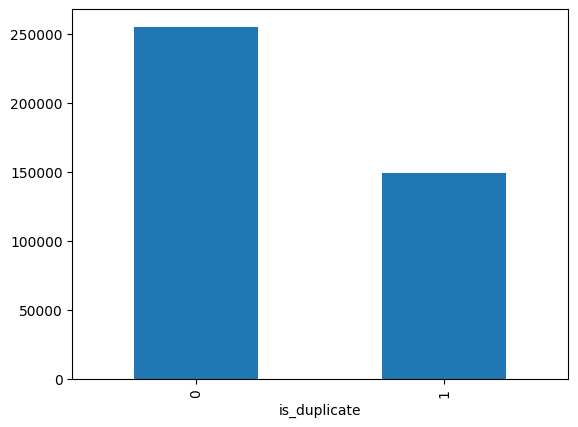

In [10]:
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()*100/df['is_duplicate'].count())
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions: ", np.unique(qid).shape[0])
print('Number of questions that appear multiple times: ', np.sum(qid.value_counts() > 1))

Number of unique questions:  537929
Number of questions that appear multiple times:  111778


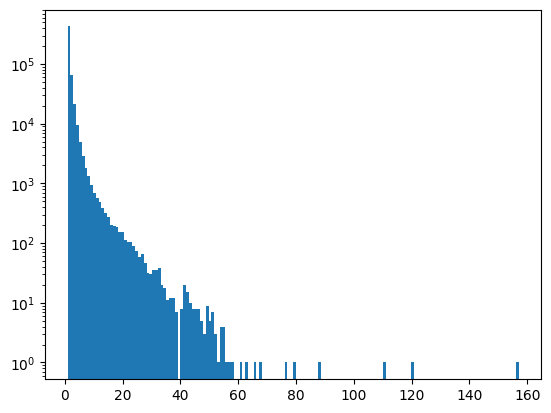

In [12]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [29]:
def preprocess(q):
    q = str(q).lower().strip()

    q = q.replace('%', ' percent')
    q = q.replace('₹', ' rupee')
    q = q.replace('$', ' dollar')
    q = q.replace('€', ' euro')
    q = q.replace('@', ' at ')
    
    q = q.replace(",000,000,000", 'b ')
    q = q.replace(",000,000", 'm ')
    q = q.replace(",000", 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }

    for word in q.split(" "):
        if word in contractions:
            q = q.replace(word, contractions[word])

    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Rwmoving HTML Tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove Punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    # Remove Stopwords
    # from nltk.corpus import stopwords
    # for i in q.split():
    #     if i in stopwords.words('english'):
    #         q = q.replace(i, '')

    q = q.strip()

    return " ".join(q.split())


In [14]:
preprocess("I've already! wasn't <b>done</b>? and you happy")

'i have already was not done and you happy'

In [15]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [16]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
273103,273103,391505,391506,what does melanin do,what is melanin,0
46413,46413,83027,83028,work visas how long does it take to get a labo...,how long does it take for an indian to get a g...,0
261725,261725,235420,105357,how apps like paytm earn profit when they are ...,cashback how does paytm earn money even after ...,1
295150,295150,417149,417150,i have very skinny hands how can i make them b...,does having bigger hands make catching frisbee...,0
283231,283231,403298,403299,what is the difference between fat and calories,what is the difference between kilocalories an...,0


In [17]:
df['q1_len']  = df['question1'].str.len()
df['q2_len']  = df['question2'].str.len()
df['q1_word_len'] = df['question1'].apply(lambda x: len(x.split()))
df['q2_word_len'] = df['question2'].apply(lambda x: len(x.split()))
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len
290267,290267,411532,411533,what is the real purpose of studying,what is purpose of study,1,36,24,7,5
79554,79554,135435,135436,where is the best place to take a staycation i...,where is the best place to get a tattoo in the...,0,60,55,13,13
365081,365081,495176,248470,what has what is the shortest possible time to...,which people became the fastest billionaires i...,0,67,75,12,12
398575,398575,531808,130417,what are the best coding bootcamps in the uk,what are the best coding bootcamps,0,44,34,9,6
115320,115320,188067,188068,how does the gay rights movement compare to ci...,why should not the gay rights movement be comp...,1,65,79,11,14


In [18]:
def common_words(row):
    q1 = set(row['question1'].split())
    q2 = set(row['question2'].split())
    return len(q1.intersection(q2))

In [19]:
df['word_common'] = df.apply(common_words, axis=1)

In [20]:
df['word_total'] = df['q1_word_len'] + df['q2_word_len']

In [21]:
df['word_share'] = round(df['word_common'] / df['word_total'], 2)

In [22]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,word_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,26,0.42
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,25,0.28
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,48,59,11,13,0,24,0.00
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20,0.20


### Advance Features

In [23]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']

    token_features = [0.0]*8


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    stop_words = set(stopwords.words('english'))

    q1_stopwords = set([word for word in q1_tokens if word in stop_words])
    q2_stopwords = set([word for word in q2_tokens if word in stop_words])

    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])

    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stopwords.intersection(q2_stopwords))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + 0.0001)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + 0.0001)
    token_features[2] = common_stop_count / (min(len(q1_stopwords), len(q2_stopwords)) + 0.0001)
    token_features[3] = common_stop_count / (max(len(q1_stopwords), len(q2_stopwords)) + 0.0001)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + 0.0001)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + 0.0001)

    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [24]:
import time

def expected_time(df, func):
    # Sample 10,000 rows randomly (or any appropriate sample size)
    sample_size = 10000
    sample_df = df.sample(n=sample_size, random_state=42)

    # Measure execution time for the sample
    start_time = time.time()

    # Apply the function to the sample
    sample_features = sample_df.apply(func, axis=1)

    end_time = time.time()

    # Calculate the time for the sample
    sample_time = end_time - start_time
    avg_time_per_row = sample_time / sample_size

    # Estimate for the full dataset
    total_rows = len(df)
    estimated_time = avg_time_per_row * total_rows

    print(f"Execution time for {sample_size} rows: {sample_time:.2f} seconds")
    print(f"Average time per row: {avg_time_per_row:.6f} seconds")
    print(f"Estimated time for {total_rows} rows: {estimated_time:.2f} seconds")


In [25]:
token_features = df.apply(fetch_token_features, axis=1)

df['cwc_min'] = list(map(lambda x: x[0], token_features))
df['cwc_max'] = list(map(lambda x: x[1], token_features))
df['csc_min'] = list(map(lambda x: x[2], token_features))
df['csc_max'] = list(map(lambda x: x[3], token_features))
df['ctc_min'] = list(map(lambda x: x[4], token_features))
df['ctc_max'] = list(map(lambda x: x[5], token_features))
df['last_word_eq'] = list(map(lambda x: x[6], token_features))
df['first_word_eq'] = list(map(lambda x: x[7], token_features))

In [26]:
df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
15927,15927,30388,30389,what was your first sex experience,how was the experience when you had sex for th...,1,34,58,6,12,...,18,0.22,0.999967,0.749981,0.333322,0.142855,0.666656,0.333331,0.0,0.0
274423,274423,393060,393061,what is the meaning of the song high hopes the...,what are some songs like high hopes by pink floyd,0,88,49,17,10,...,27,0.22,0.666656,0.399996,0.499988,0.399992,0.599994,0.352939,1.0,1.0


In [27]:
import distance
def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    q1_tokens = q1.split(' ')
    q2_tokens = q2.split(' ')

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length between tokens of q1 and q2
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average distance between tokens of q1 and q2
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    # Normalized legth between q1 and q2 (Longest Common Substring)
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:  # Check if strs is not empty
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features

In [28]:
length_features = df.apply(fetch_length_features, axis=1)


In [29]:

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2,13.0,0.982456
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5,12.5,0.571429
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4,12.0,0.169492
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,48,59,11,13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2,12.0,0.040816
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6,10.0,0.153846


In [30]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [31]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,0.0,1.0,2,13.0,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,...,0.466664,0.0,1.0,5,12.5,0.571429,65,73,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.285712,0.0,1.0,4,12.0,0.169492,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,48,59,11,13,...,0.000000,0.0,0.0,2,12.0,0.040816,9,11,24,28
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,0.307690,0.0,1.0,6,10.0,0.153846,36,55,47,67


Execution time for 30000 rows: 8.33 seconds
Average time per row: 0.000278 seconds
Estimated time for 404287 rows: 112.29 seconds


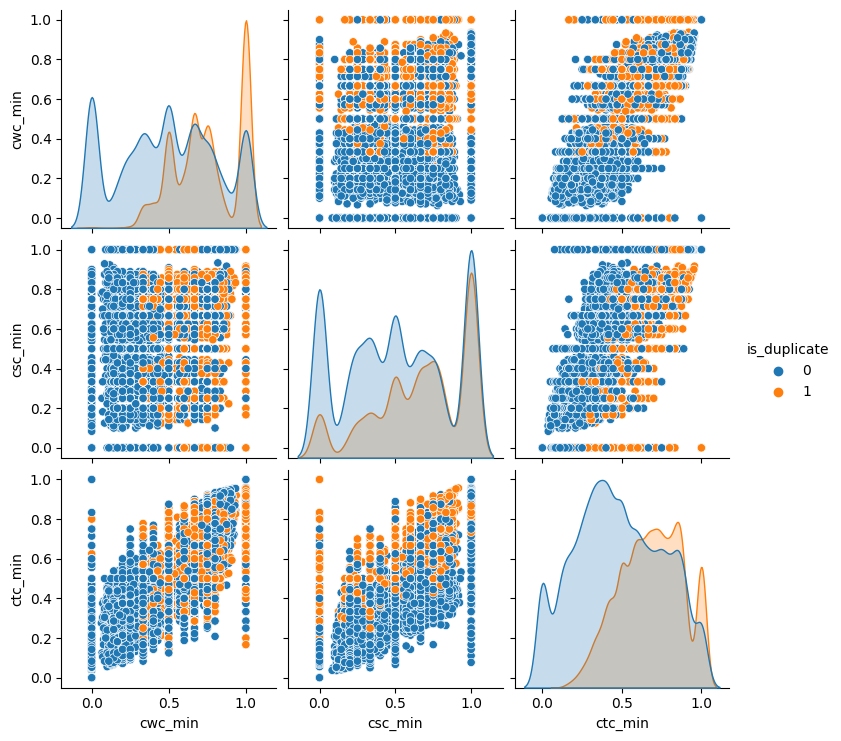

In [29]:
sample_size = 30000
sample_df = df.sample(n=sample_size, random_state=10)

start_time = time.time()

sns.pairplot(sample_df[['cwc_min','csc_min', 'ctc_min', 'is_duplicate']], hue='is_duplicate', diag_kind='kde')

end_time = time.time()
# Calculate the time for the sample
sample_time = end_time - start_time
avg_time_per_row = sample_time / sample_size
# Estimate for the full dataset
total_rows = len(df)
estimated_time = avg_time_per_row * total_rows
print(f"Execution time for {sample_size} rows: {sample_time:.2f} seconds")
print(f"Average time per row: {avg_time_per_row:.6f} seconds")
print(f"Estimated time for {total_rows} rows: {estimated_time:.2f} seconds")

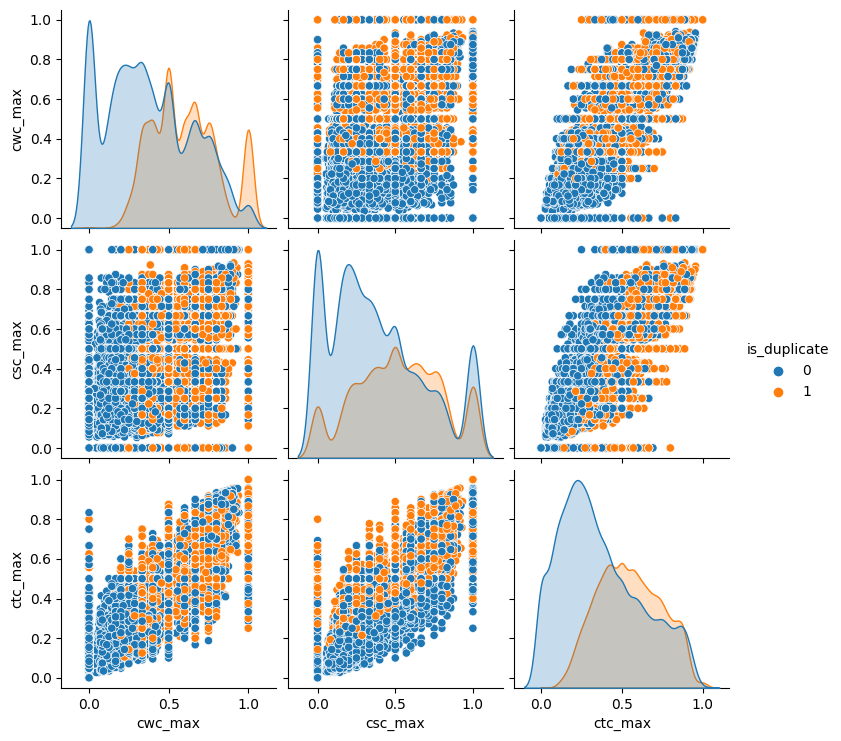

In [30]:
sns.pairplot(sample_df[['cwc_max','csc_max', 'ctc_max', 'is_duplicate']], hue='is_duplicate', diag_kind='kde')

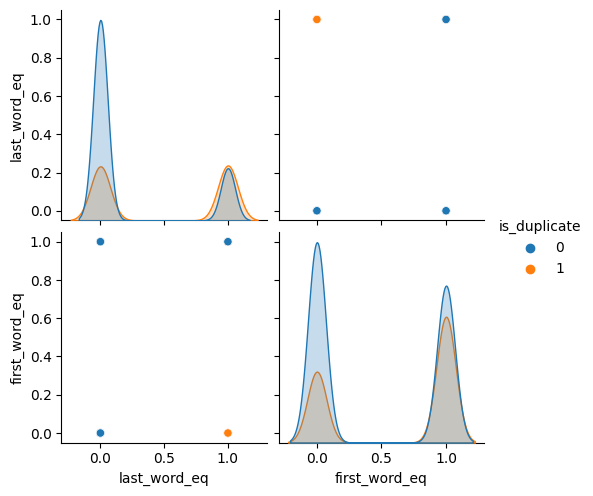

In [31]:
sns.pairplot(sample_df[['last_word_eq','first_word_eq', 'is_duplicate']], hue='is_duplicate', diag_kind='kde')

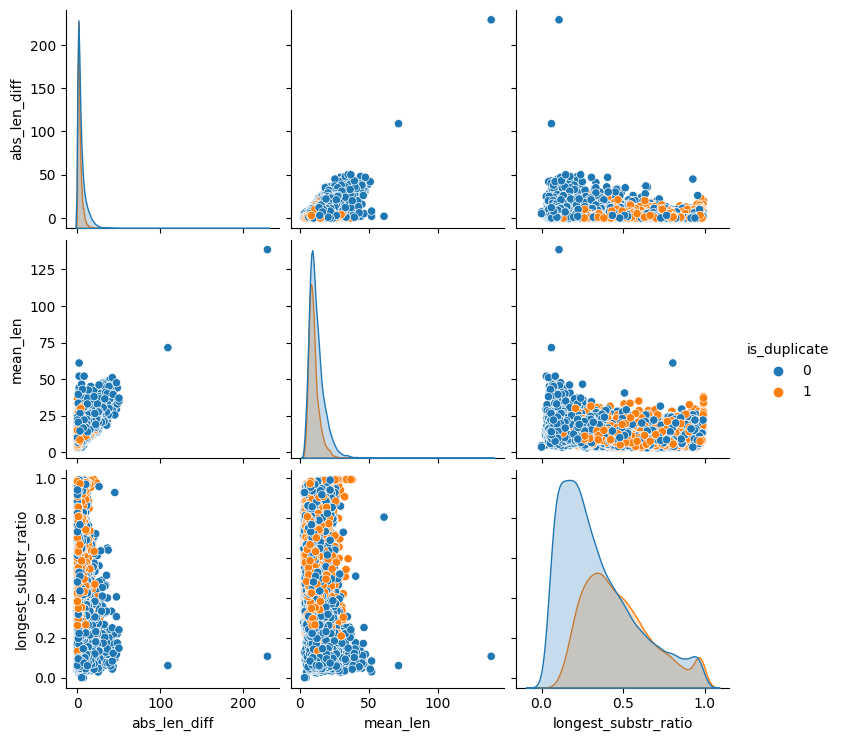

In [32]:
sns.pairplot(sample_df[["abs_len_diff", "mean_len", "longest_substr_ratio", 'is_duplicate']], hue='is_duplicate', diag_kind='kde')

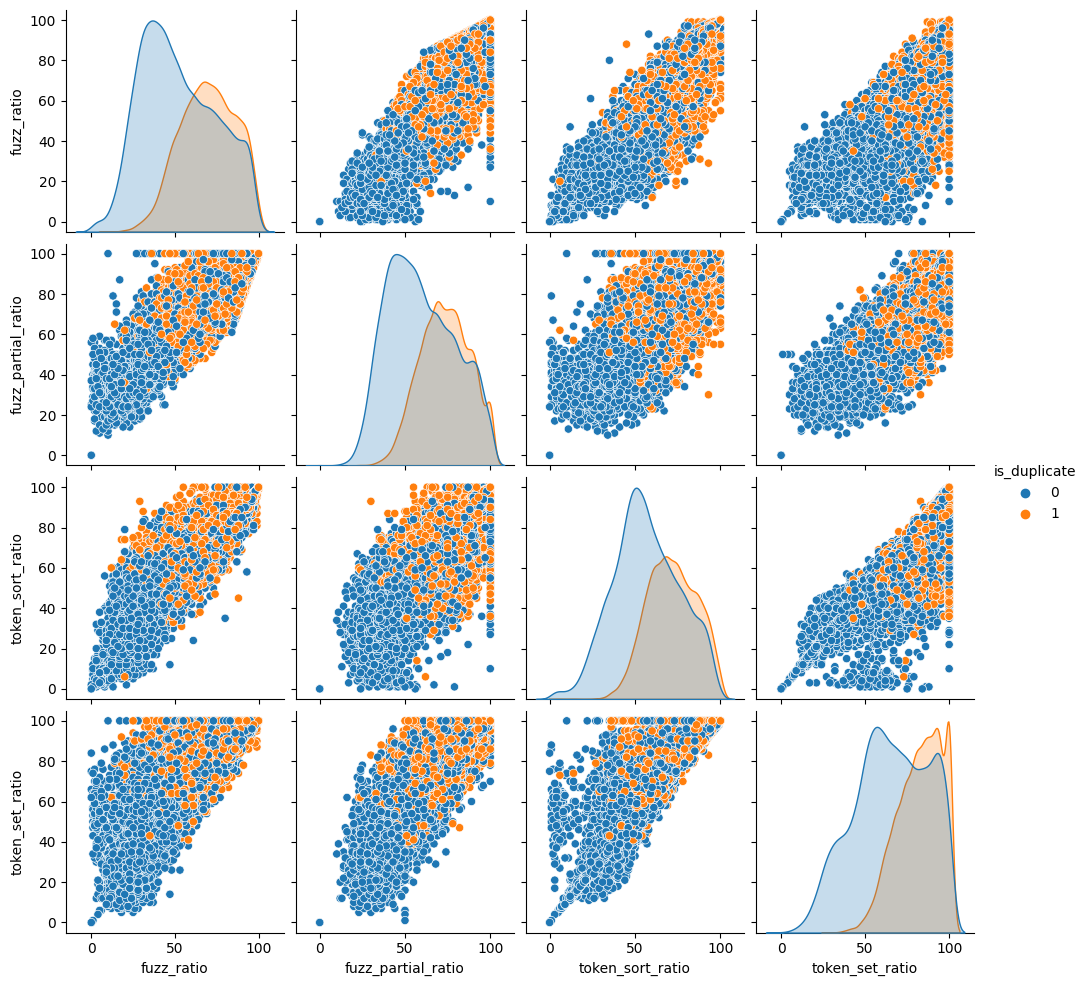

In [33]:
sns.pairplot(sample_df[["fuzz_ratio", "fuzz_partial_ratio", "token_sort_ratio", 'token_set_ratio', 'is_duplicate']], hue='is_duplicate', diag_kind='kde')

## Word2Vec

In [32]:
df.shape

(404287, 28)

In [33]:
ques_df = df[['question1', 'question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water


In [34]:
params_df = df.iloc[:, 5:]

In [35]:
corpus = []
from nltk.tokenize import word_tokenize, sent_tokenize

ques_df['question1'] = ques_df['question1'].apply(lambda x: word_tokenize(x))
ques_df['question2'] = ques_df['question2'].apply(lambda x: word_tokenize(x))

In [36]:
corpus = ques_df['question1'].tolist() + ques_df['question2'].tolist()
corpus

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what',
  'is',
  'the',
  'story',
  'of',
  'kohinoor',
  'koh',
  'i',
  'noor',
  'diamond'],
 ['how',
  'can',
  'i',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'a',
  'vpn'],
 ['why',
  'am',
  'i',
  'mentally',
  'very',
  'lonely',
  'how',
  'can',
  'i',
  'solve',
  'it'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'and',
  'carbon',
  'di',
  'oxide'],
 ['astrology',
  'i',
  'am',
  'a',
  'capricorn',
  'sun',
  'cap',
  'moon',
  'and',
  'cap',
  'rising',
  'what',
  'does',
  'that',
  'say',
  'about',
  'me'],
 ['should', 'i', 'buy', 'tiago'],
 ['how', 'can', 'i', 'be', 'a', 'good', 'geologist'],
 ['when', 'do', 'you', 'use', 'シ', 'instead', 'of', 'し'],
 ['motorola',
  'company',
  'can',
  'i',
  'hack',
  'my'

In [37]:
import gensim
import os
model = gensim.models.Word2Vec(
        sentences=corpus,    # Your tokenized corpus
        vector_size=300,               # Embedding dimension (300)
        window=5,                      # Context window size (5)
        min_count=5,                   # Minimum frequency for words (5)
        sg=0,                          # CBOW model (0 for CBOW, 1 for Skip-gram)
        negative=10,                   # Negative sampling (10)
        epochs=10,                     # Number of iterations (epochs)
        workers=os.cpu_count(),        # Parallel processing (use all cores)
        alpha=0.03,                    # Initial learning rate
        min_alpha=0.0007,              # Minimum learning rate after decay
        sample=1e-5,
        hs=0  
        )

In [38]:
len([word for sent in corpus for word in sent])

9133978

In [39]:
# Save the trained model
model.save("optimized_word2vec.model")

# Print the vocabulary size
print(f"Vocabulary size: {len(model.wv)}")

Vocabulary size: 30466


In [40]:
model.wv.most_similar('girlfriend', topn=10)


[('boyfriend', 0.9463481903076172),
 ('gf', 0.9249357581138611),
 ('ex', 0.8919269442558289),
 ('cheated', 0.8796090483665466),
 ('bf', 0.8753740191459656),
 ('her', 0.8654645681381226),
 ('dumped', 0.8534793257713318),
 ('talked', 0.8505866527557373),
 ('girlfriends', 0.8395276665687561),
 ('confess', 0.8389866948127747)]

In [27]:
# Function to get sentence embedding by averaging the word embeddings
def get_sentence_embedding(sentence, model):
    # Tokenize the sentence and get the word vectors for each token
    tokens = sentence
    
    # Get embeddings for each word in the sentence
    word_vectors = [model.wv[token] for token in tokens if token in model.wv]
    
    # If there are no valid word vectors (for empty sentence or unknown words), return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    
    # Average the word vectors to get a sentence vector
    return np.mean(word_vectors, axis=0)

In [42]:
question1_embeddings = []
question2_embeddings = []

# Set batch size (you can tweak this size to avoid memory errors)
batch_size = 1000
total_rows = len(ques_df)

# Process the questions in batches to avoid MemoryError
for start_idx in range(0, total_rows, batch_size):
    end_idx = min(start_idx + batch_size, total_rows)
    
    # Extract the batch of questions
    batch_q1 = ques_df['question1'].iloc[start_idx:end_idx]
    batch_q2 = ques_df['question2'].iloc[start_idx:end_idx]
    
    # Process question1 and question2 for this batch
    batch_q1_embeddings = [get_sentence_embedding(q1, model) for q1 in batch_q1]
    batch_q2_embeddings = [get_sentence_embedding(q2, model) for q2 in batch_q2]
    
    # Append the embeddings to the lists
    question1_embeddings.extend(batch_q1_embeddings)
    question2_embeddings.extend(batch_q2_embeddings)
    print(f'Batch {start_idx}/{total_rows} executed')

# Convert the embeddings into DataFrames after processing all batches
q1_embeddings_df = pd.DataFrame(question1_embeddings)
q2_embeddings_df = pd.DataFrame(question2_embeddings)

# Optionally, you can add column names like 'dim_1', 'dim_2', ..., 'dim_n'
q1_embeddings_df.columns = [f"q1_dim_{i+1}" for i in range(q1_embeddings_df.shape[1])]
q2_embeddings_df.columns = [f"q2_dim_{i+1}" for i in range(q2_embeddings_df.shape[1])]


Batch 0/404287 executed
Batch 1000/404287 executed
Batch 2000/404287 executed
Batch 3000/404287 executed
Batch 4000/404287 executed
Batch 5000/404287 executed
Batch 6000/404287 executed
Batch 7000/404287 executed
Batch 8000/404287 executed
Batch 9000/404287 executed
Batch 10000/404287 executed
Batch 11000/404287 executed
Batch 12000/404287 executed
Batch 13000/404287 executed
Batch 14000/404287 executed
Batch 15000/404287 executed
Batch 16000/404287 executed
Batch 17000/404287 executed
Batch 18000/404287 executed
Batch 19000/404287 executed
Batch 20000/404287 executed
Batch 21000/404287 executed
Batch 22000/404287 executed
Batch 23000/404287 executed
Batch 24000/404287 executed
Batch 25000/404287 executed
Batch 26000/404287 executed
Batch 27000/404287 executed
Batch 28000/404287 executed
Batch 29000/404287 executed
Batch 30000/404287 executed
Batch 31000/404287 executed
Batch 32000/404287 executed
Batch 33000/404287 executed
Batch 34000/404287 executed
Batch 35000/404287 executed
Batch

In [53]:
# Combine the embeddings with the original questions
final_df = pd.concat([params_df, q1_embeddings_df, q2_embeddings_df], axis=1)

# Display the final DataFrame with question1, question2, and their embeddings
final_df.head()

,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,word_common,word_total,word_share,cwc_min,cwc_max,...,q2_dim_291,q2_dim_292,q2_dim_293,q2_dim_294,q2_dim_295,q2_dim_296,q2_dim_297,q2_dim_298,q2_dim_299,q2_dim_300
0,0.0,65.0,56.0,14.0,12.0,11.0,26.0,0.42,0.999980,0.833319,...,0.026519,0.201663,0.234258,-0.262118,-0.137895,0.218711,0.092664,-0.286149,-0.126627,-0.013533
1,0.0,48.0,85.0,10.0,15.0,7.0,25.0,0.28,0.799984,0.399996,...,-0.048604,0.228515,0.389947,-0.010859,-0.187601,0.040926,0.045297,-0.200039,-0.153095,0.090364
2,0.0,72.0,58.0,14.0,10.0,4.0,24.0,0.17,0.399992,0.333328,...,0.075366,0.099123,0.174287,-0.068948,-0.113596,0.030138,-0.019215,0.063250,0.082914,0.017961
3,0.0,48.0,59.0,11.0,13.0,0.0,24.0,0.00,0.000000,0.000000,...,-0.058600,-0.280162,0.012535,-0.189759,0.000041,0.132575,0.187768,-0.345397,0.023703,-0.021713
4,0.0,73.0,38.0,13.0,7.0,4.0,20.0,0.20,0.399992,0.199998,...,-0.116266,0.063004,0.793130,-0.126369,0.044370,-0.044171,0.053631,-0.024489,-0.105130,0.117983


In [54]:
final_df.shape

(404290, 623)

In [45]:
final_df.to_csv("Word2Vec data.csv")

In [3]:
final_df = pd.read_csv("Word2Vec data.csv", index_col=False)

In [7]:
final_df.isnull().sum()

Unnamed: 0      0
is_duplicate    0
q1_len          0
q2_len          0
q1_word_len     0
               ..
q2_dim_296      0
q2_dim_297      0
q2_dim_298      0
q2_dim_299      0
q2_dim_300      0
Length: 624, dtype: int64

In [5]:
final_df.dropna(inplace=True, axis=0, how='any')

In [6]:
final_df.shape

(404283, 624)

In [11]:
y = final_df.iloc[:,1]

In [12]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
404279    1.0
404280    0.0
404281    1.0
404282    0.0
404283    1.0
Name: is_duplicate, Length: 404283, dtype: float64

In [13]:
X = final_df.iloc[:,2:]
X.head()

,q1_len,q2_len,q1_word_len,q2_word_len,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,...,q2_dim_291,q2_dim_292,q2_dim_293,q2_dim_294,q2_dim_295,q2_dim_296,q2_dim_297,q2_dim_298,q2_dim_299,q2_dim_300
0,65.0,56.0,14.0,12.0,11.0,26.0,0.42,0.999980,0.833319,0.999983,...,0.026519,0.201663,0.234258,-0.262118,-0.137895,0.218711,0.092664,-0.286149,-0.126627,-0.013533
1,48.0,85.0,10.0,15.0,7.0,25.0,0.28,0.799984,0.399996,0.749981,...,-0.048604,0.228515,0.389947,-0.010859,-0.187601,0.040926,0.045297,-0.200039,-0.153095,0.090364
2,72.0,58.0,14.0,10.0,4.0,24.0,0.17,0.399992,0.333328,0.399992,...,0.075366,0.099123,0.174287,-0.068948,-0.113596,0.030138,-0.019215,0.063250,0.082914,0.017961
3,48.0,59.0,11.0,13.0,0.0,24.0,0.00,0.000000,0.000000,0.000000,...,-0.058600,-0.280162,0.012535,-0.189759,0.000041,0.132575,0.187768,-0.345397,0.023703,-0.021713
4,73.0,38.0,13.0,7.0,4.0,20.0,0.20,0.399992,0.199998,0.999950,...,-0.116266,0.063004,0.793130,-0.126369,0.044370,-0.044171,0.053631,-0.024489,-0.105130,0.117983


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, criterion= 'log_loss', n_jobs=-1)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_jobs=-1)

In [17]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.74025749162101

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[41215, 10061],
       [10941, 18640]], dtype=int64)

In [20]:
import gensim

# Load the saved model
model = gensim.models.Word2Vec.load("optimized_word2vec.model")


In [21]:
from nltk.corpus import stopwords

def test_fetch_token_features(row):
    q1 = row['question1'].values[0]
    q2 = row['question2'].values[0]

    token_features = [0.0]*8


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    stop_words = set(stopwords.words('english'))

    q1_stopwords = set([word for word in q1_tokens if word in stop_words])
    q2_stopwords = set([word for word in q2_tokens if word in stop_words])

    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])

    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stopwords.intersection(q2_stopwords))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + 0.0001)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + 0.0001)
    token_features[2] = common_stop_count / (min(len(q1_stopwords), len(q2_stopwords)) + 0.0001)
    token_features[3] = common_stop_count / (max(len(q1_stopwords), len(q2_stopwords)) + 0.0001)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + 0.0001)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + 0.0001)

    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [22]:
import distance
def test_fetch_length_features(row):
    q1 = row['question1'].values[0]
    q2 = row['question2'].values[0]

    length_features = [0.0]*3

    q1_tokens = q1.split(' ')
    q2_tokens = q2.split(' ')

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length between tokens of q1 and q2
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average distance between tokens of q1 and q2
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    # Normalized legth between q1 and q2 (Longest Common Substring)
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:  # Check if strs is not empty
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features

In [23]:
from fuzzywuzzy import fuzz

def test_fetch_fuzzy_features(row):
    
    q1 = row['question1'].values[0]
    q2 = row['question2'].values[0]
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [24]:
def query_point_creator(q1, q2):
    query_point = []

    #preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    #fetch basic features
    query_point.append(len(q1))
    query_point.append(len(q2))
    query_point.append(len(q1.split()))
    query_point.append(len(q2.split()))

    #test common words
    q1_temp = set(q1.split())
    q2_temp = set(q2.split())
    query_point.append(len(q1_temp.intersection(q2_temp)))
    
    query_point.append(len(q1.split()) + len(q2.split()))
    query_point.append(round(query_point[4] / query_point[5], 2))

    #fetch token features
    query_point.extend(test_fetch_token_features(pd.DataFrame({'question1': [q1], 'question2': [q2]})))

    #fetch length features
    query_point.extend(test_fetch_length_features(pd.DataFrame({'question1': [q1], 'question2': [q2]})))

    #fetch fuzzy features
    query_point.extend(test_fetch_fuzzy_features(pd.DataFrame({'question1': [q1], 'question2': [q2]})))

    #fetch word2vec features
    q1_embedding = get_sentence_embedding(q1, model)
    q2_embedding = get_sentence_embedding(q2, model)

    # return query_point
    # return q1_embedding

    return np.hstack((np.array(query_point).reshape(1,-1), q1_embedding.reshape(1,-1), q2_embedding.reshape(1,-1)))


In [25]:
final_df.iloc[8,23:26]

token_set_ratio    93.000000
q1_dim_1           -0.294946
q1_dim_2            0.318545
Name: 8, dtype: float64

In [30]:
print((get_sentence_embedding(preprocess("When do you use シ instead of し?"), model)))

[ 4.31077898e-01  1.68499038e-01  2.67189324e-01 -8.49892478e-03
 -2.08842620e-01 -1.88961312e-01 -1.12250477e-01  3.59213442e-01
 -7.47997090e-02  7.85468519e-02 -3.07959318e-01 -1.42899044e-02
  1.23761699e-01  1.72421828e-01 -4.17778909e-01 -2.31678933e-02
  1.11311607e-01  6.01240285e-02 -1.38352141e-01  1.47522807e-01
 -3.01883280e-01 -1.86332971e-01  1.53258279e-01  1.39549419e-01
 -2.06304272e-03 -7.68631473e-02  7.10343421e-02  2.57190108e-01
 -4.72662300e-02 -1.14119686e-01  2.54254192e-02 -5.40162027e-02
  1.36280417e-01 -7.01718032e-02  4.23958242e-01 -1.33393213e-01
 -5.45427911e-02 -4.81278487e-02  1.06339708e-01  2.01011777e-01
  1.89854622e-01 -9.89374295e-02 -7.40266666e-02 -4.55391198e-01
  1.61321133e-01  1.71738580e-01  6.82097226e-02  6.39529228e-01
 -1.16012681e+00 -1.27693517e-02 -1.63993582e-01  3.62377644e-01
 -1.20885678e-01  9.25116912e-02  2.52354383e-01  3.34983058e-02
 -5.00042200e-01  4.18519020e-01 -4.87019159e-02  3.37829217e-02
 -2.79979765e-01 -3.70703

In [31]:
final_df.iloc[8,:10]

Unnamed: 0       8.00000
is_duplicate     0.00000
q1_len          30.00000
q2_len          30.00000
q1_word_len      8.00000
q2_word_len      7.00000
word_common      6.00000
word_total      15.00000
word_share       0.40000
cwc_min          0.99995
Name: 8, dtype: float64

In [32]:
print(query_point_creator("When do you use シ instead of し?","When do you use ""&"" instead of ""and""?"))


[[ 3.00000000e+01  3.00000000e+01  8.00000000e+00  7.00000000e+00
   6.00000000e+00  1.50000000e+01  4.00000000e-01  9.99950002e-01
   4.99987500e-01  9.99975001e-01  7.99984000e-01  8.57130612e-01
   7.49990625e-01  0.00000000e+00  1.00000000e+00  1.00000000e+00
   7.50000000e+00  5.16129032e-01  9.00000000e+01  9.00000000e+01
   8.70000000e+01  9.30000000e+01  4.31077898e-01  1.68499038e-01
   2.67189324e-01 -8.49892478e-03 -2.08842620e-01 -1.88961312e-01
  -1.12250477e-01  3.59213442e-01 -7.47997090e-02  7.85468519e-02
  -3.07959318e-01 -1.42899044e-02  1.23761699e-01  1.72421828e-01
  -4.17778909e-01 -2.31678933e-02  1.11311607e-01  6.01240285e-02
  -1.38352141e-01  1.47522807e-01 -3.01883280e-01 -1.86332971e-01
   1.53258279e-01  1.39549419e-01 -2.06304272e-03 -7.68631473e-02
   7.10343421e-02  2.57190108e-01 -4.72662300e-02 -1.14119686e-01
   2.54254192e-02 -5.40162027e-02  1.36280417e-01 -7.01718032e-02
   4.23958242e-01 -1.33393213e-01 -5.45427911e-02 -4.81278487e-02
   1.06339

In [33]:
np.array(y)[7]

1.0

In [38]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the capital of India?'

In [45]:
rf.predict(np.array(final_df.iloc[7,2:]).reshape(1, -1))

array([1.])

In [41]:
# rf.predict(query_point_creator("How do I make friends.", "How to make friends ?"))
rf.predict(query_point_creator("What is the capital of France?","Which city is the capital of France?"))

array([1.])

In [42]:
rf.predict(query_point_creator(q3, q4))

array([0.])

In [43]:
preds = rf.predict(X_test)
from collections import Counter
print(Counter(preds))  # Distribution of predicted classes


Counter({0.0: 52156, 1.0: 28701})


In [44]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, rf.predict(X_test)))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80     51276
         1.0       0.65      0.63      0.64     29581

    accuracy                           0.74     80857
   macro avg       0.72      0.72      0.72     80857
weighted avg       0.74      0.74      0.74     80857

ROC-AUC Score: 0.8276024158660464


In [19]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))

## Using XGBOOST

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [49]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.756632078855263

In [52]:
xgb.predict(query_point_creator("How do I make friends.", "How to make friends ?"))
# xgb.predict(query_point_creator("What is the capital of France?","Which city is the capital of France?"))

array([0])

In [57]:
xgb.predict(query_point_creator(q1, q4))


array([1])

In [58]:
import pickle

pickle.dump(xgb,open('xgb.pkl','wb'))

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[40740, 10536],
       [ 9142, 20439]], dtype=int64)